# Project - Index Tracking and Forward Testing

### Importing Data

In [1]:
import pandas as pd

In [3]:
const = pd.read_csv("resources/const_prices.csv", parse_dates=["Date"], index_col="Date")


In [4]:
dji = pd.read_csv("resources/dji.csv", parse_dates=["Date"], index_col="Date")

In [6]:
dji = dji["Close"].to_frame().copy()

In [8]:
df = pd.concat([const, dji], axis=1)

In [9]:
df.rename(columns={"Close":"DJI"}, inplace=True)

In [12]:
more_info  = pd.read_csv("resources/const.csv")

### Tranforming the Data

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

In [21]:
norm = df.div(df.iloc[0,:]).mul(100)


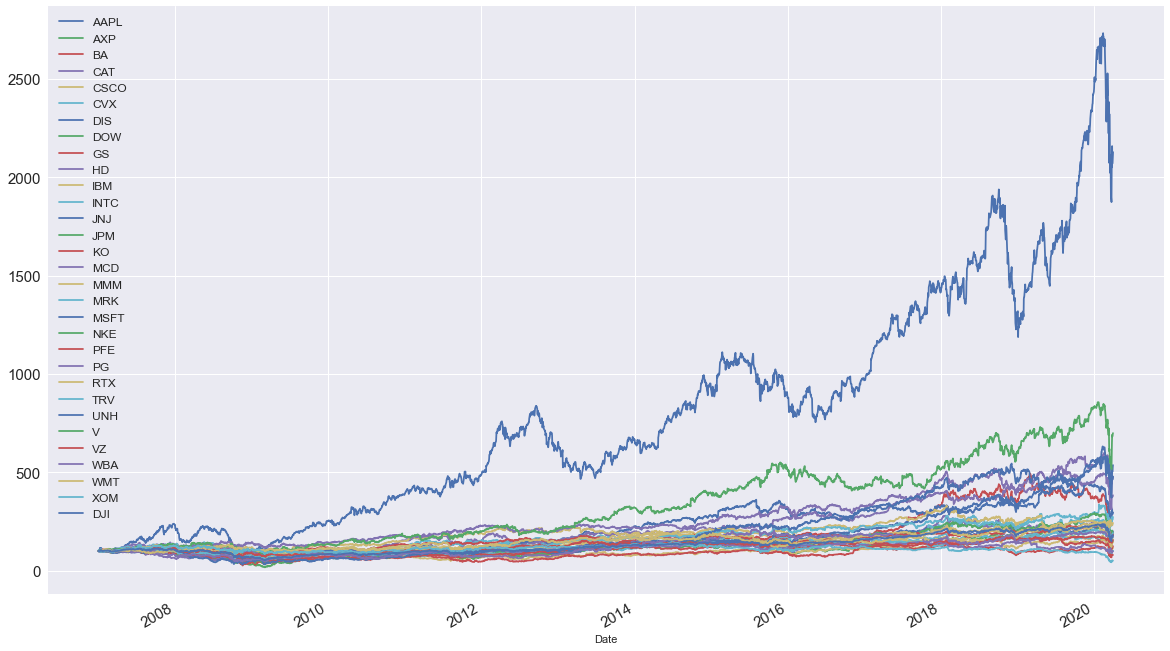

In [22]:
norm.plot(figsize=(20,12), fontsize=15)
plt.legend(fontsize=12)
plt.show()

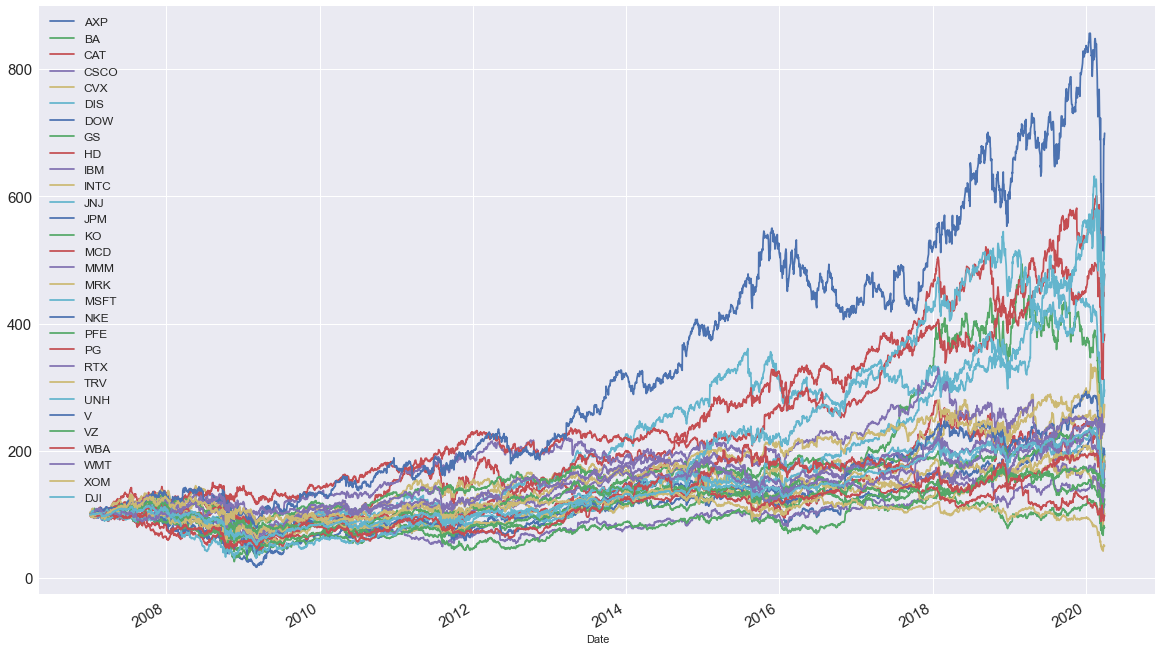

In [23]:
norm.drop(columns=["AAPL"]).plot(figsize=(20,12), fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [24]:
ret = df.pct_change()

In [26]:
ret.describe()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,259.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3029.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.001124,0.000404,0.000375,0.000393,0.000288,0.000172,0.000476,-0.001557,0.000221,0.000618,...,0.000244,0.000263,0.000362,0.000689,0.000996,0.000225,0.000153,0.000349,-0.000077,0.000252
std,0.020285,0.023861,0.020633,0.020599,0.018732,0.018264,0.017384,0.033533,0.024183,0.017243,...,0.011926,0.015987,0.018255,0.021072,0.019155,0.013661,0.017826,0.012961,0.015945,0.012395
min,-0.179195,-0.175949,-0.238484,-0.142822,-0.162107,-0.221248,-0.129846,-0.216577,-0.189596,-0.197938,...,-0.087373,-0.144765,-0.208004,-0.186362,-0.136435,-0.080685,-0.149873,-0.101832,-0.139525,-0.129265
25%,-0.007882,-0.007507,-0.008608,-0.008954,-0.007302,-0.007602,-0.006837,-0.014935,-0.009635,-0.006983,...,-0.004799,-0.006487,-0.006244,-0.008082,-0.007500,-0.006508,-0.008169,-0.005572,-0.007159,-0.003935
50%,0.000985,0.000643,0.000694,0.000392,0.000443,0.000633,0.000572,0.000554,0.000258,0.000528,...,0.000250,0.000508,0.000668,0.000616,0.001224,0.000525,0.000105,0.000540,0.000000,0.000560
75%,0.011166,0.009351,0.009931,0.010251,0.008722,0.008351,0.008090,0.012207,0.010234,0.008160,...,0.005530,0.007680,0.007360,0.009279,0.009248,0.006994,0.008873,0.006329,0.007235,0.005288
max,0.139050,0.218823,0.243186,0.147229,0.159505,0.227407,0.159722,0.209091,0.264678,0.140666,...,0.120090,0.157572,0.255556,0.347550,0.149973,0.146324,0.166355,0.117085,0.171905,0.113650


In [27]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"]*252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean","std"], inplace = True)
    return summary


In [32]:
summary = summary_ann(ret)


In [33]:
summary = summary.merge(more_info.loc[:,["Ticker","Company"]], how="left", left_index=True, right_on="Ticker")

In [34]:
summary.set_index("Company", inplace=True)

In [35]:
summary

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA
Caterpillar Inc.,0.099013,0.327003,CAT
Cisco Systems,0.072630,0.297358,CSCO
Chevron Corporation,0.043249,0.289927,CVX
The Walt Disney Company,0.119955,0.275958,DIS
Dow Inc.,-0.392383,0.532319,DOW
Goldman Sachs,0.055702,0.383889,GS


In [36]:
summary.rename(index = {np.nan:"Dow Jones"}, inplace=True)

In [37]:
summary

,Return,Risk,Ticker
Company,,,
Apple Inc.,0.283326,0.322011,AAPL
American Express,0.101747,0.378787,AXP
Boeing,0.094477,0.327538,BA
Caterpillar Inc.,0.099013,0.327003,CAT
Cisco Systems,0.072630,0.297358,CSCO
Chevron Corporation,0.043249,0.289927,CVX
The Walt Disney Company,0.119955,0.275958,DIS
Dow Inc.,-0.392383,0.532319,DOW
Goldman Sachs,0.055702,0.383889,GS


### Explanatory Data Analysism

In [38]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3334 entries, 2007-01-03 to 2020-03-30
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3333 non-null   float64
 1   AXP     3333 non-null   float64
 2   BA      3333 non-null   float64
 3   CAT     3333 non-null   float64
 4   CSCO    3333 non-null   float64
 5   CVX     3333 non-null   float64
 6   DIS     3333 non-null   float64
 7   DOW     259 non-null    float64
 8   GS      3333 non-null   float64
 9   HD      3333 non-null   float64
 10  IBM     3333 non-null   float64
 11  INTC    3333 non-null   float64
 12  JNJ     3333 non-null   float64
 13  JPM     3333 non-null   float64
 14  KO      3333 non-null   float64
 15  MCD     3333 non-null   float64
 16  MMM     3333 non-null   float64
 17  MRK     3333 non-null   float64
 18  MSFT    3333 non-null   float64
 19  NKE     3333 non-null   float64
 20  PFE     3333 non-null   float64
 21  PG      3333 non-nu

In [44]:
summary2 = summary.drop(index="Dow Inc.")

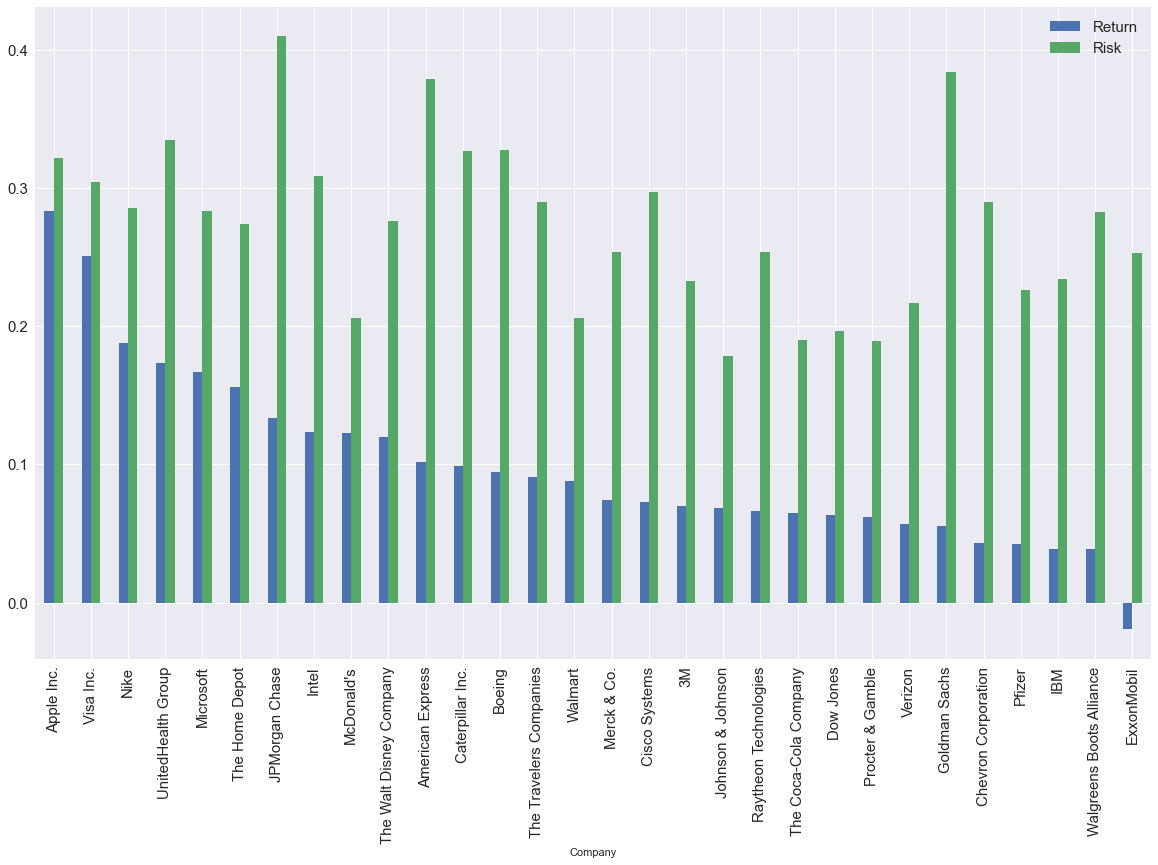

In [45]:
summary2.sort_values(by="Return", ascending=False).plot(kind="bar", figsize=(20,12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

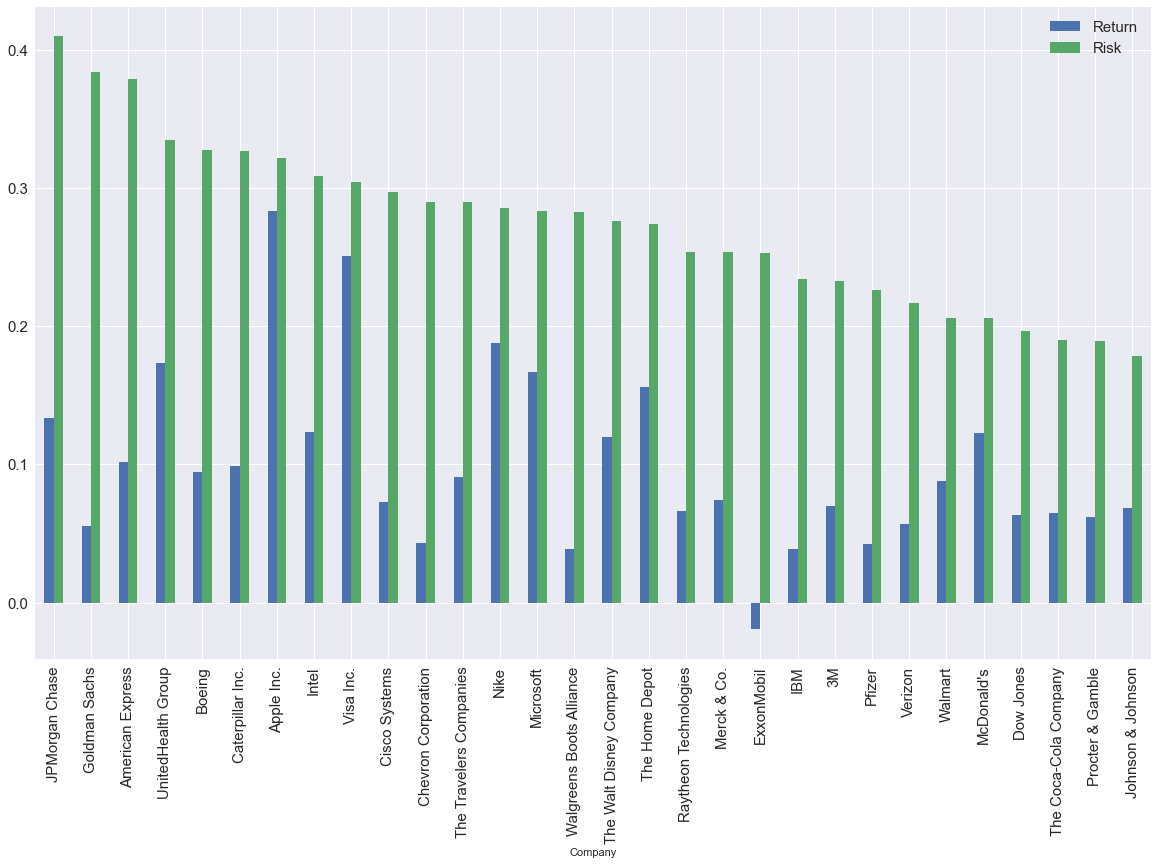

In [46]:
summary2.sort_values(by="Risk", ascending=False).plot(kind="bar", figsize=(20,12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [47]:
summary2.set_index("Ticker", inplace=True)

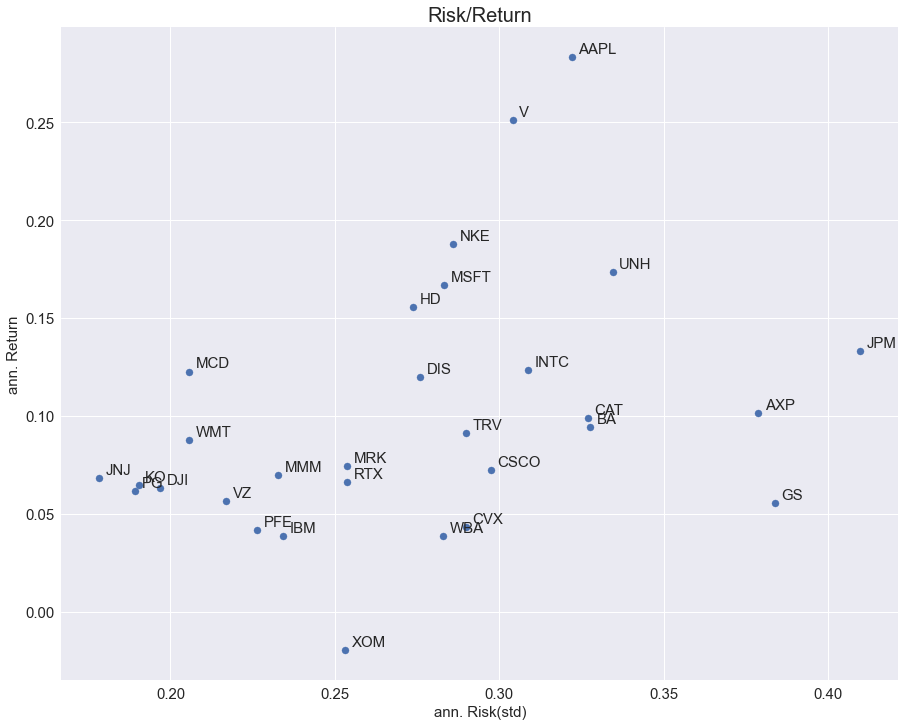

In [53]:
summary2.plot(kind="scatter", x="Risk", y="Return", figsize=(15,12), s=50, fontsize=15)
for i in summary2.index:
    plt.annotate(i, xy=(summary2.loc[i, "Risk"]+0.002, summary2.loc[i, "Return"]+0.002), size=15)
plt.xlabel("ann. Risk(std)", fontsize =15)
plt.ylabel("ann. Return", fontsize=15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [54]:
corr_matrix = ret.corr()
corr_matrix

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,DJI
AAPL,1.000000,0.480043,0.438086,0.487226,0.525349,0.449052,0.468580,0.631347,0.476691,0.463329,...,0.363393,0.498010,0.426388,0.390673,0.500869,0.355473,0.358347,0.322451,0.440548,0.621928
AXP,0.480043,1.000000,0.550139,0.595983,0.552228,0.573059,0.627933,0.585071,0.681464,0.602880,...,0.469506,0.632661,0.604635,0.463337,0.608325,0.462106,0.396338,0.372094,0.543933,0.771359
BA,0.438086,0.550139,1.000000,0.553999,0.485747,0.571662,0.566121,0.502373,0.501920,0.527704,...,0.417925,0.680807,0.465494,0.437456,0.470835,0.378064,0.368819,0.331806,0.562232,0.736430
CAT,0.487226,0.595983,0.553999,1.000000,0.568403,0.617253,0.585367,0.759624,0.565734,0.526940,...,0.411556,0.655219,0.473390,0.399110,0.501120,0.433708,0.402600,0.357269,0.617244,0.760203
CSCO,0.525349,0.552228,0.485747,0.568403,1.000000,0.533596,0.583010,0.596760,0.546383,0.531232,...,0.476467,0.587765,0.482416,0.405247,0.510966,0.459482,0.427154,0.416851,0.550696,0.727891
CVX,0.449052,0.573059,0.571662,0.617253,0.533596,1.000000,0.600033,0.541230,0.556975,0.531485,...,0.490095,0.652896,0.570728,0.497396,0.509172,0.475042,0.390131,0.360023,0.850689,0.787176
DIS,0.468580,0.627933,0.566121,0.585367,0.583010,0.600033,1.000000,0.524249,0.584596,0.595523,...,0.530826,0.649854,0.543394,0.475446,0.531920,0.487684,0.442776,0.423168,0.604449,0.781622
DOW,0.631347,0.585071,0.502373,0.759624,0.596760,0.541230,0.524249,1.000000,0.660349,0.568539,...,0.495249,0.589982,0.565861,0.505610,0.613575,0.451777,0.431488,0.489743,0.705081,0.714794
GS,0.476691,0.681464,0.501920,0.565734,0.546383,0.556975,0.584596,0.660349,1.000000,0.566183,...,0.404795,0.572156,0.569984,0.455331,0.553344,0.420014,0.389854,0.349454,0.533439,0.729825
HD,0.463329,0.602880,0.527704,0.526940,0.531232,0.531485,0.595523,0.568539,0.566183,1.000000,...,0.481375,0.603150,0.552381,0.460427,0.535062,0.480420,0.444288,0.490327,0.512038,0.748406


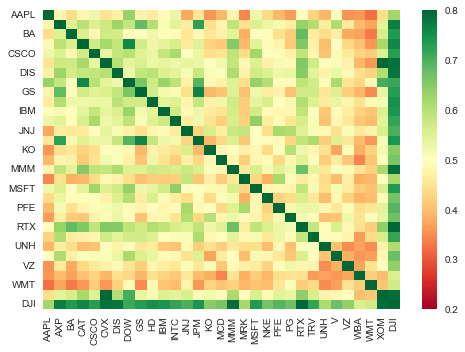

In [56]:
import seaborn as  sns
sns.heatmap(corr_matrix, cmap="RdYlGn", annot=False, vmin=0.2, vmax=0.8)
plt.show()

In [ ]:
###